In [1]:
import pandas as pd

# Veriyi yükle
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

# Boyutlar
print("Train:", train.shape)
print("Test:", test.shape)

# İlk 5 satır
train.head()


Train: (15289, 18)
Test: (10194, 17)


,id,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
0,0,25.0,0.50,0.25,0.75,0.50,69.7,42.1,58.2,50.2,24.3,41.2,24.0,0.39,0.425011,0.417545,32.460887,4476.81146
1,1,25.0,0.50,0.25,0.50,0.50,69.7,42.1,58.2,50.2,24.3,41.2,24.0,0.39,0.444908,0.422051,33.858317,5548.12201
2,2,12.5,0.25,0.25,0.63,0.63,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.552927,0.470853,38.341781,6869.77760
3,3,12.5,0.25,0.25,0.63,0.50,77.4,46.8,64.7,55.8,27.0,45.8,24.0,0.39,0.565976,0.478137,39.467561,6880.77590
4,4,25.0,0.50,0.25,0.63,0.63,77.4,46.8,64.7,55.8,27.0,45.8,24.0,0.39,0.579677,0.494165,40.484512,7479.93417


In [2]:
# Eksik veri analizi
print(train.isnull().sum())

# Sütun bilgisi
train.info()


id                      0
clonesize               0
honeybee                0
bumbles                 0
andrena                 0
osmia                   0
MaxOfUpperTRange        0
MinOfUpperTRange        0
AverageOfUpperTRange    0
MaxOfLowerTRange        0
MinOfLowerTRange        0
AverageOfLowerTRange    0
RainingDays             0
AverageRainingDays      0
fruitset                0
fruitmass               0
seeds                   0
yield                   0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15289 entries, 0 to 15288
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    15289 non-null  int64  
 1   clonesize             15289 non-null  float64
 2   honeybee              15289 non-null  float64
 3   bumbles               15289 non-null  float64
 4   andrena               15289 non-null  float64
 5   osmia                 15289 non-null  float64
 6

Hedef Değişken Dağılımı & Korelasyon

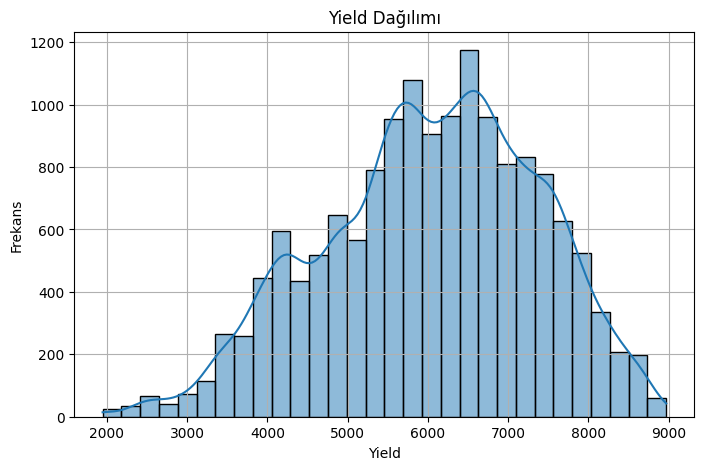

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.histplot(train["yield"], bins=30, kde=True)
plt.title("Yield Dağılımı")
plt.xlabel("Yield")
plt.ylabel("Frekans")
plt.grid(True)
plt.show()

Korelasyon Matrisi (Isı Haritası)

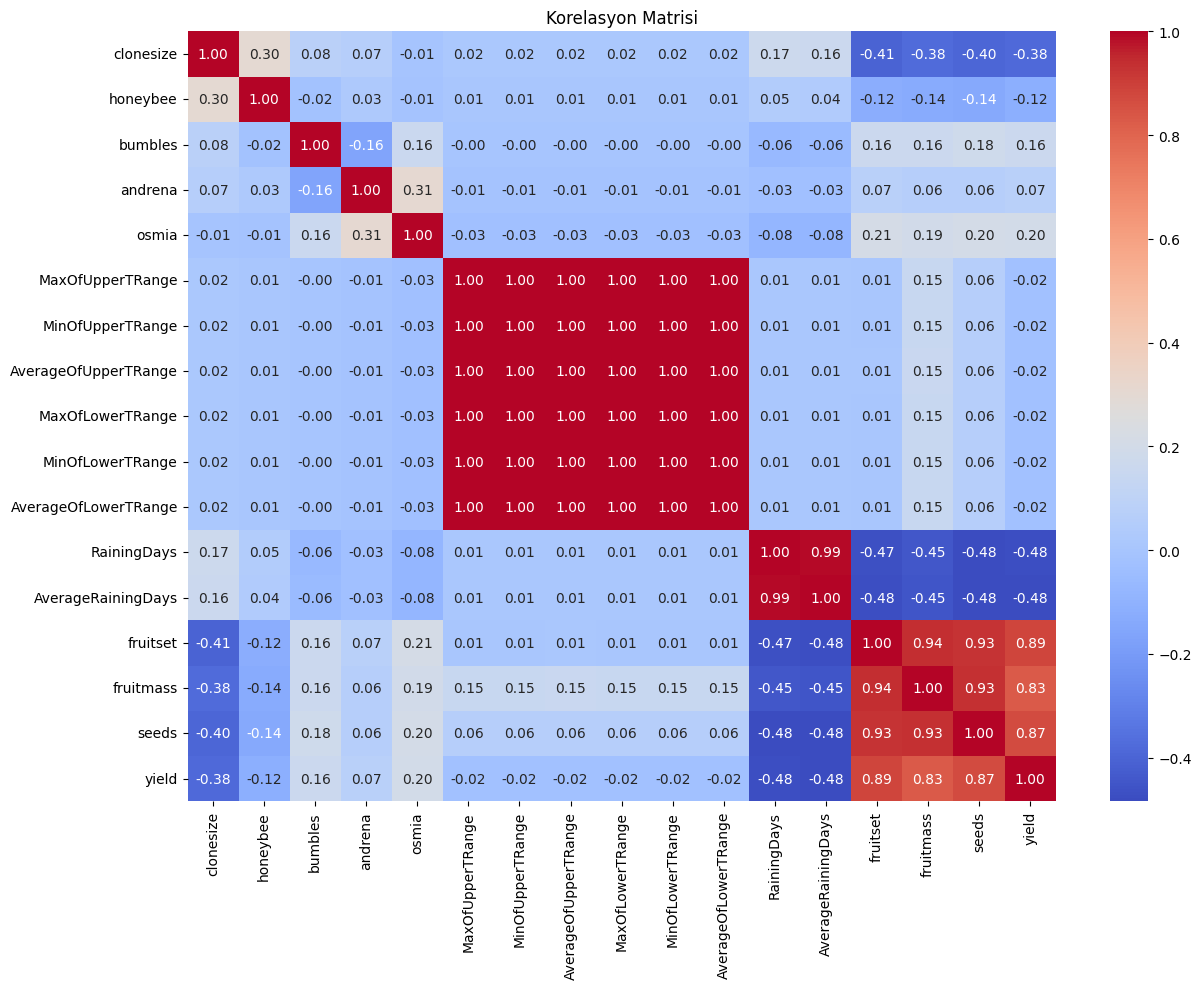

In [4]:
plt.figure(figsize=(14,10))
corr = train.drop(columns=["id"]).corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Korelasyon Matrisi")
plt.show()

Random Forest ile Model Eğitimi

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# 🎯 Hedef ve özellikleri ayır
X = train.drop(columns=["id", "yield"])
y = train["yield"]

# 🧪 Eğitim ve test veri setine ayır (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 🌲 Modeli tanımla ve eğit
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 🔮 Tahmin yap
y_pred = model.predict(X_test)

# 📊 Değerlendirme
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("RMSE:", round(rmse, 4))
print("R² Score:", round(r2, 4))


RMSE: 573.8073
R² Score: 0.8127


In [6]:
# test.csv için Tahmin + Submission Oluşturma

In [7]:
# test verisini yükle
test = pd.read_csv("test.csv")
submission = pd.read_csv("sample_submission.csv")

# 'id' sütununu sakla ve çıkar
test_ids = test["id"]
X_test = test.drop(columns=["id"])

# model tahmini
test_preds = model.predict(X_test)

# submission dosyasına tahminleri yaz
submission["yield"] = test_preds
submission.to_csv("submission.csv", index=False)

print("✅ submission.csv başarıyla oluşturuldu.")


✅ submission.csv başarıyla oluşturuldu.


In [8]:
import joblib

# Modeli ve kullanılan feature isimlerini kaydet
joblib.dump(model, "rf_model.pkl")
joblib.dump(list(X.columns), "model_columns.pkl")


['model_columns.pkl']